<!--
StackExchange Signal Processing Q19646
https://dsp.stackexchange.com/questions/19646/
Are Convolution and Deconvolution Kernels the Same?
-->

## Question - When Are the Convolution Operator (Kernel) and the Deconvolution Operator (Kernel) the Same?

[Discrete Convolution (Cyclic)][1] is described by [Circulant Matrix][2].  
Circulant Matrices are diagonalized by the [DFT Matrix][3] (Will be denoted as $ F $).  
So given a convolution kernel $ g $ with its matrix form given by $ G $ one could have its [diagonalization][4] by:

$$ G = {F}^{H} \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) F $$

Where $ \mathcal{F} \left( g \right) $ is the [Discrete Fourier Transform (DFT)][5] of the kernel $ g $.

In the general case the [deconvolution][6] is given by:

$$ x = G h \Rightarrow {G}^{-1} x = {G}^{-1} G h = h $$

Where $ {G}^{-1} $ is the Deconvolution Operator (Inverse of $ G $ the convolution operator).  
In our case we're looking for the case $ G = {G}^{-1} \Rightarrow G G = I $.  

Utilizing the diagonalization of Discrete (Cyclic) Convolution Operators by the DFT Matrix (Which is [Unitary Matrix][7]):

$$ G G = {F}^{H} \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) F {F}^{H} \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) F = {F}^{H} \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) F $$

Namely we need $ \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) \operatorname{diag} \left( \mathcal{F} \left( g \right) \right) = I $ which means $ \forall i, \, {\mathcal{F} \left( g \right)}_{i} \in \left\{ -1, 1 \right\} $, namely the Fourier Transform of $ g $ has the values of -1 or 1.  
So there is a set of kernels $ \mathcal{S} $ which is defined by:

$$ \mathcal{S} = \left\{ g \mid \forall i, \, {\mathcal{F} \left( g \right)}_{i} \in \left\{ -1, 1 \right\} \right\} $$

One should notice that the identity Kernel ($ I $) is indeed part of this set of kernels.

The above kernels obey $ \delta \left[ n \right] = \left( g \circ g \right) \left[ n \right] $ where $ \circ $ is the Circular Convolution (Which is multiplication of the DFT).

How could one generate such a kernel?  
Well, just generate a vector of numbers which each is composed of $ 1 $ or $ -1 $ and use its `ifft()`.  
Pay attention that if you are after real operator the vector must obey the symmetry of the [DFT for Real Numbers][8].


  [1]: https://en.wikipedia.org/wiki/Convolution#Circular_discrete_convolution
  [2]: https://en.wikipedia.org/wiki/Circulant_matrix
  [3]: https://en.wikipedia.org/wiki/DFT_matrix
  [4]: https://en.wikipedia.org/wiki/Diagonalizable_matrix
  [5]: https://en.wikipedia.org/wiki/Discrete_Fourier_transform
  [6]: https://en.wikipedia.org/wiki/Deconvolution
  [7]: https://en.wikipedia.org/wiki/Unitary_matrix
  [8]: https://en.wikipedia.org/wiki/Discrete_Fourier_transform#The_real-input_DFT

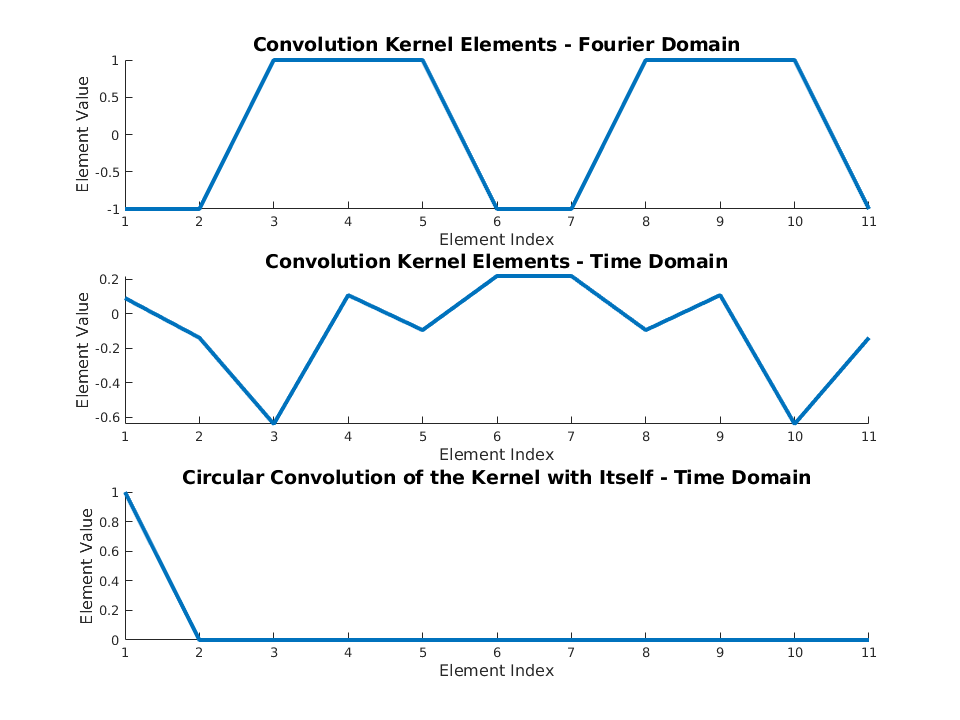

In [1]:
% StackExchange Signal Processing Q19646
% https://dsp.stackexchange.com/questions/19646/
% Are Convolution and Deconvolution Kernels the Same?
% References:
%   1.  aa
% Remarks:
%   1.  This creates a Convolution Kernel which is the inverse of itself.
%       Namely in the case of Deconvolution the Convolution Kernel and the
%       Deconvolution Kernel are the same.
% TODO:
% 	1.  ds
% Release Notes
% - 1.0.000     26/05/2018  Royi
%   *   First release.


%% General Parameters

run('InitScript.m');

figureIdx           = 0; %<! Continue from Question 1
figureCounterSpec   = '%04d';

generateFigures = OFF;


%% Simulation Parameters

numElements = 11; %<! Number of Elements in the Kernel


%% Generating the Kernel (Real)

isEven = mod(numElements, 2) == 0;
numElmntsBase = ceil((numElements + isEven) / 2);

% Base Kernel (Before Complex Conjugate Symmetry) must contain -1 or 1.
vBaseKernel = round(rand([numElmntsBase, 1]));
vBaseKernel(vBaseKernel == 0) = -1;

% Complex Conjugate Symmetry (Pay attention to Odd / Even number of
% elements)
vConvKernelDft = [vBaseKernel; flip(vBaseKernel(2:(end - isEven)), 1)];

vConvKernel = ifft(vConvKernelDft); %<! The Convolution Kernel in Time Domain


%% Display Results

figureIdx = figureIdx + 1;

hFigure         = figure('Position', figPosLarge);
hAxes           = subplot(3, 1, 1);
hLineSeries     = line(1:numElements, vConvKernelDft);
set(hLineSeries, 'LineWidth', lineWidthNormal);
set(get(hAxes, 'Title'), 'String', {['Convolution Kernel Elements - Fourier Domain']}, ...
    'FontSize', fontSizeTitle);
set(get(hAxes, 'XLabel'), 'String', {['Element Index']}, ...
    'FontSize', fontSizeAxis);
set(get(hAxes, 'YLabel'), 'String', {['Element Value']}, ...
    'FontSize', fontSizeAxis);

hAxes           = subplot(3, 1, 2);
hLineSeries     = line(1:numElements, vConvKernel);
set(hLineSeries, 'LineWidth', lineWidthNormal);
set(get(hAxes, 'Title'), 'String', {['Convolution Kernel Elements - Time Domain']}, ...
    'FontSize', fontSizeTitle);
set(get(hAxes, 'XLabel'), 'String', {['Element Index']}, ...
    'FontSize', fontSizeAxis);
set(get(hAxes, 'YLabel'), 'String', {['Element Value']}, ...
    'FontSize', fontSizeAxis);
% hLegend = ClickableLegend({['Ground Truth'], ['Estimated']});

hAxes           = subplot(3, 1, 3);
hLineSeries     = line(1:numElements, cconv(vConvKernel, vConvKernel, numElements));
% hLineSeries     = line(1:numElements, ifft(fft(vConvKernel) .* fft(vConvKernel))); %<! Circular Convolution in the Frequency Domain
set(hLineSeries, 'LineWidth', lineWidthNormal);
set(get(hAxes, 'Title'), 'String', {['Circular Convolution of the Kernel with Itself - Time Domain']}, ...
    'FontSize', fontSizeTitle);
set(get(hAxes, 'XLabel'), 'String', {['Element Index']}, ...
    'FontSize', fontSizeAxis);
set(get(hAxes, 'YLabel'), 'String', {['Element Value']}, ...
    'FontSize', fontSizeAxis);

if(generateFigures == ON)
    saveas(hFigure,['Figure', num2str(figureIdx, figureCounterSpec), '.png']);
end


%% Restore Defaults

% set(0, 'DefaultFigureWindowStyle', 'normal');
% set(0, 'DefaultAxesLooseInset', defaultLoosInset);



As can be seen above, The kernel in the *Frequency Domain* is indeed composed by the values $ \left\{ -1, 1 \right\} $. It also keeps on Complex Conjugate Symmetry in order to generate Real Values in the *Time Domain*.  
The Kernel in *Time Domain* is indeed Real and as can be seen in the lowest plot generates the Discrete Delta Function when convolved (Circular Convolution) with itself.